In [2]:
import numpy as np
import pandas as pd

In [3]:
#Reading CSV File
health=pd.read_csv(r'C:\Users\Kritika\OneDrive\Desktop\Great Lakes\NPV\Mini Project\emp_health.csv')

In [4]:
#Read the dataset and do primary study of data. Perform following steps: 
# a.Reading some rows of dataset
health.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520


In [5]:
#b.Learn data types of all features
health.dtypes

id              object
age              int64
sex             object
bmi            float64
dependent        int64
alcohol         object
smoke           object
zone            object
expenditure    float64
dtype: object

In [6]:
#c.See the statistical properties of the data.
health.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#1.How many employees above 50 age smoke, what is their average expenditure on health management? 

smoke_50=health[(health['age']>50) & (health['smoke']=='yes')]
#smoke_50.head()

print('Number of employees above age 50 who smoke = ',len(smoke_50))
print('Average expenditure of such employees on health management = ',round(smoke_50['expenditure'].mean(),2))

Number of employees above age 50 who smoke =  64
Average expenditure of such employees on health management =  38820.22


In [8]:
#2.How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

female_alcohol=health[(health['sex']=='female') & (health['alcohol']!='daily')]
#female_alcohol.head()
print('Female employees who did not consume alcohol daily = ',len(female_alcohol))

female=health[health['sex']=='female']
#female.head()
print('Total female employees = ',len(female))

proportion=len(female_alcohol)/len(female)
print('Proportion of female employees who did not consume alcohol daily with respect to total female employees = ',round(proportion*100,2))

Female employees who did not consume alcohol daily =  453
Total female employees =  662
Proportion of female employees who did not consume alcohol daily with respect to total female employees =  68.43


In [9]:
#3.Display zone wise average expenditure of employees on health

grouped_zone=health.groupby(by='zone')
avg_exp=grouped_zone.mean()
print('Zone wise average expenditure of employees on health:\n ',avg_exp['expenditure'])

Zone wise average expenditure of employees on health:
  zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64


In [10]:
# 4.Employees of which zone did maximum expenditure on health

grouped_zone=health.groupby(by='zone')
sum_exp=grouped_zone.sum()
print(round(sum_exp['expenditure'],2))

print()
print('Employees of which zone did maximum expenditure on health =',sum_exp['expenditure'].idxmax())

zone
east         3608966.14
north         987180.84
northeast    1013409.41
northwest    1761996.88
south        1236117.92
southeast    2861684.04
southwest    3191988.05
west         3094481.71
Name: expenditure, dtype: float64

Employees of which zone did maximum expenditure on health = east


In [11]:
#5.What is the minimum expenditure done by any employee in organization

min_exp=health['expenditure'].min()
print('Minimum expenditure done by any employee in an organization =',min_exp)

Minimum expenditure done by any employee in an organization = 1121.8739


In [12]:
# 6.What is average expenditure of employees who have 2 or lesser dependents?

dep=health[health['dependent']<=2]
#dep.head()
print('Average expenditure of employees who have 2 or lesser dependents =',round(dep['expenditure'].mean(),2))

Average expenditure of employees who have 2 or lesser dependents = 13040.97


In [13]:
#7.How many employees are below age of 20 years. What is their average BMI?

age20=health[health['age']<20]
#age20.head()

print('Number of employees below the age of 20 years =',len(age20))
print('Their average BMI =',round(age20['bmi'].mean(),2))

Number of employees below the age of 20 years = 137
Their average BMI = 29.97


In [14]:
#8.Create a dataframe "non_smoker" for all non-smoker male employees

non_smoker=health[(health['sex']=='male') & (health['smoke']=='no')]
non_smoker.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070


In [15]:
#9.Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

non_alcoholic=health[(health['sex']=='male') & (health['alcohol']=='no')]
non_alcoholic.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630


In [16]:
#10.Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol.
#The dataframe should contain columns id, smoke, alcohol

non_smoking_alcoholic=pd.merge(non_smoker,non_alcoholic,how='inner')
non_smoking_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10030,56,male,40.300,0,no,no,southwest,10602.38500
1,i10036,37,male,28.025,2,no,no,northwest,6203.90175
2,i10040,23,male,17.385,1,no,no,northwest,2775.19215
3,i10049,26,male,20.800,0,no,no,southwest,2302.30000
4,i10079,40,male,26.315,1,no,no,northwest,6389.37785
...,...,...,...,...,...,...,...,...,...
104,i11273,28,male,37.100,1,no,no,southwest,3277.16100
105,i11282,26,male,33.915,1,no,no,west,3292.52985
106,i11322,42,male,26.315,1,no,no,west,6940.90985
107,i11332,31,male,31.065,3,no,no,west,5425.02335


In [17]:
#or

non_smoking_alcoholic=health[(health['sex']=='male') & (health['alcohol']=='no') & (health['smoke']=='no')]
non_smoking_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
67,i10079,40,male,26.315,1,no,no,northwest,6389.37785
...,...,...,...,...,...,...,...,...,...
1261,i11273,28,male,37.100,1,no,no,southwest,3277.16100
1270,i11282,26,male,33.915,1,no,no,west,3292.52985
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


In [18]:
#11.What is the count for each zone with respect to number of dependent

grouped_zone=health.groupby(by='zone')
dep_count=grouped_zone.count()
print('Count for each zone with respect to number of dependent:\n',dep_count['dependent'])

Count for each zone with respect to number of dependent:
 zone
east         262
north         70
northeast     74
northwest    145
south         84
southeast    198
southwest    251
west         254
Name: dependent, dtype: int64


In [19]:
#12. Classify the employees into 3 categories.
#Category 1 : employees below 18.5 bmi - underweight

underweight=health[health['bmi']<18.5]
underweight.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
128,i10140,32,female,17.765,2,weekend,yes,northwest,32734.18630
172,i10184,18,male,15.960,0,party,no,north,1694.79640
198,i10210,51,female,18.050,0,weekend,no,northwest,9644.25250
232,i10244,19,female,17.800,0,party,no,southwest,1727.78500


In [20]:
#Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit

fit=health[(health['bmi']>=18.5) & (health['bmi']<=24.9)]
fit.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
15,i10027,19,male,24.600,1,party,no,southwest,1837.23700
17,i10029,23,male,23.845,0,weekend,no,north,2395.17155
26,i10038,63,female,23.085,0,weekend,no,north,14451.83515
35,i10047,19,male,20.425,0,party,no,northwest,1625.43375


In [21]:
#Category 3 : employee with bmi over 24.9 - overweight

overweight=health[health['bmi']>24.9]
overweight.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.90,0,daily,yes,southwest,16884.9240
1,i10013,18,male,33.77,1,weekend,no,south,1725.5523
2,i10014,28,male,33.00,3,rarely,no,south,4449.4620
4,i10016,32,male,28.88,0,party,no,northwest,3866.8552
5,i10017,31,female,25.74,0,no,no,south,3756.6216


In [22]:
#What is the average expenditure of employees in each category?

avg_exp_underweight=underweight['expenditure'].mean()
avg_exp_fit=fit['expenditure'].mean()
avg_exp_overweight=overweight['expenditure'].mean()

print('Average expenditure of employees in underweight category =',round(avg_exp_underweight,2))
print('Average expenditure of employees in fit category =',round(avg_exp_fit,2))
print('Average expenditure of employees in overweight category =',round(avg_exp_overweight,2))

Average expenditure of employees in underweight category = 8852.2
Average expenditure of employees in fit category = 10379.5
Average expenditure of employees in overweight category = 13936.62


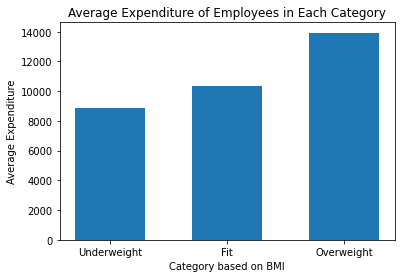

In [23]:
#Display the bar chart for the same

import matplotlib.pyplot as plt

category=['Underweight','Fit','Overweight']
exp=[underweight['expenditure'].mean(),fit['expenditure'].mean(),overweight['expenditure'].mean()]

plt.bar(x=category,height=exp,width=0.6)

plt.title('Average Expenditure of Employees in Each Category',fontsize=12)
plt.xlabel('Category based on BMI')
plt.ylabel('Average Expenditure')

plt.show()

In [24]:
#13. Draw line plot of expenditure against age and BMI

conditions = [
    (health['bmi'] < 18.5),
    (health['bmi'] >= 18.5) & (health['bmi'] <= 24.9),
    (health['bmi'] > 24.9),
    ]

values = ['Underweight', 'Fit', 'Overweight']

health['BMI'] = np.select(conditions, values)

health.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,BMI
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400,Overweight
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230,Overweight
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200,Overweight
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061,Fit
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520,Overweight


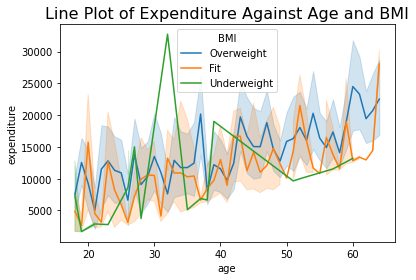

In [25]:
import seaborn as sns

sns.lineplot(data=health, x="age", y="expenditure", hue="BMI")

plt.title('Line Plot of Expenditure Against Age and BMI',fontsize=16)
plt.show()

Zone wise average expenditure:
 zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64


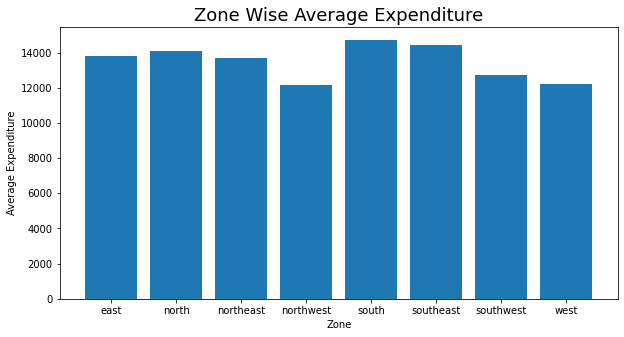

In [26]:
#14. Draw a bar chart to show zone wise average expenditure

grouped_zone=health.groupby(by='zone')
avg_exp=grouped_zone.mean()['expenditure']
print('Zone wise average expenditure:\n',avg_exp)

zones=avg_exp.index

plt.figure(figsize=(10,5))

plt.bar(x=zones,height=avg_exp,width=0.8);

plt.title('Zone Wise Average Expenditure',fontsize=18)
plt.xlabel('Zone')
plt.ylabel('Average Expenditure')

plt.show()

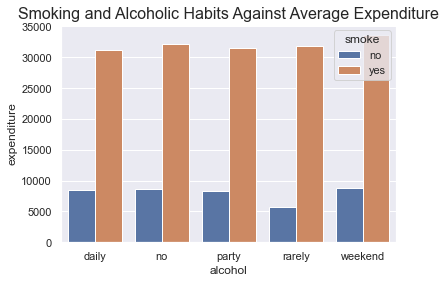

In [58]:
#15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

exp_sa = pd.pivot_table(health,values='expenditure',index=['smoke','alcohol'],aggfunc=np.mean)
exp_sa.reset_index(inplace=True)
#print(exp_sa)

import seaborn as sns

sns.barplot(x='alcohol', y='expenditure', hue='smoke', data=exp_sa)

plt.title('Smoking and Alcoholic Habits Against Average Expenditure',fontsize=16)
plt.show()

daily      395
weekend    347
party      278
no         259
rarely      59
Name: alcohol, dtype: int64

Index(['daily', 'weekend', 'party', 'no', 'rarely'], dtype='object')


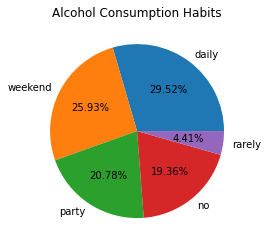

In [48]:
#16. Draw pie chart for alcohol consumption habits

cn_habits=health['alcohol'].value_counts()
print(cn_habits)
print()
print(cn_habits.index)

plt.pie(x=cn_habits,labels=cn_habits.index,autopct='%0.2f%%');
plt.title('Alcohol Consumption Habits')
plt.show()

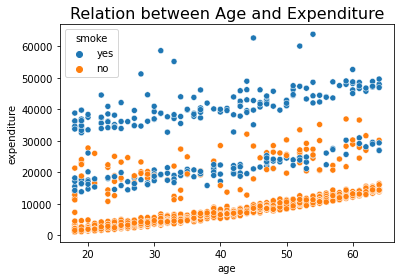

In [49]:
#17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

sns.scatterplot(x=health['age'],y=health['expenditure'],hue=health['smoke']);
plt.title("Relation between Age and Expenditure",fontsize=16)
plt.show()

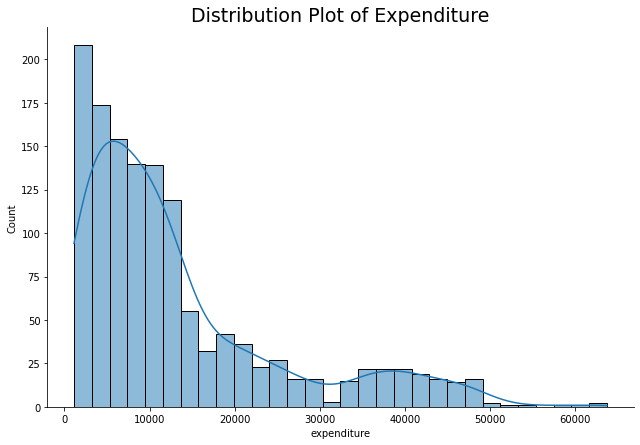

In [50]:
#18. Draw distribution plot of expenditure

sns.displot(health['expenditure'],kde=True,height=6,aspect=1.5)
plt.title('Distribution Plot of Expenditure',fontsize=19);

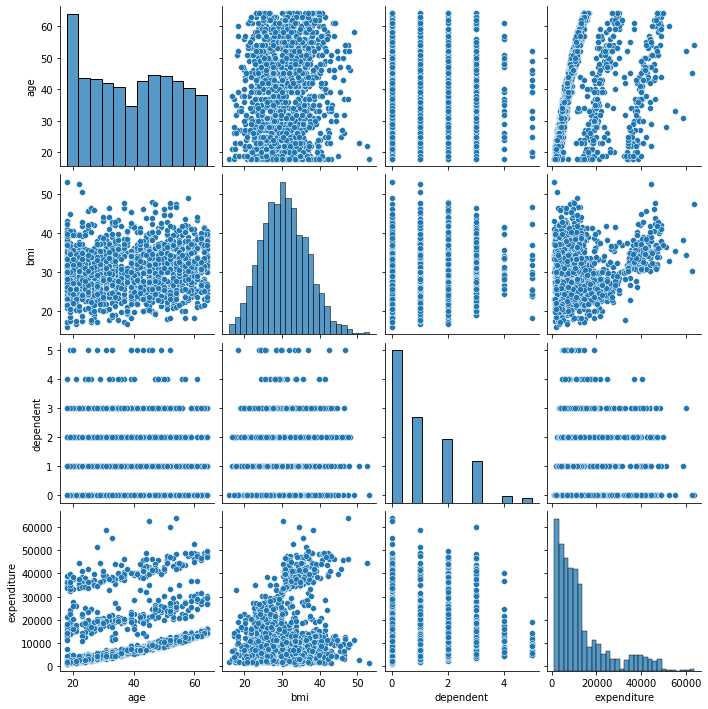

In [51]:
#19. Display the pairplot

sns.pairplot(data=health,kind='scatter');
plt.show()

In [52]:
#20. Display heatmap for the data

health.corr()

,age,bmi,dependent,expenditure
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
dependent,0.042469,0.012759,1.000000,0.067998
expenditure,0.299008,0.198341,0.067998,1.000000


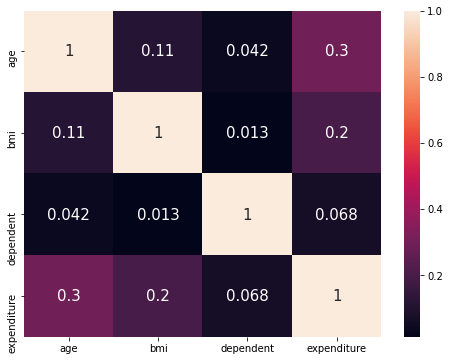

In [54]:
plt.figure(figsize=(8,6))
sns.heatmap(data=health.corr(),annot=True,annot_kws={'size':15});
plt.show()